### Machine Learning – A Gentle Introduction

In [1]:
# import
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.cross_validation import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import preprocessing, pipeline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
#Loading the IRIS dataset
iris_data = load_iris()

X = iris_data['data']
y = iris_data['target']

print(iris_data['feature_names'])
print(iris_data['target_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [3]:
# splitting and Pre-Processing the data
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.25, random_state=33)
print(X_train[:2])
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)

# Preprocessing and Standardize the features
scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train[:2])

[[ 5.   2.3  3.3  1. ]
 [ 4.9  3.1  1.5  0.1]]
X_train shape (112, 4)
X_test shape (38, 4)
[[-0.91090798 -1.59761476 -0.15438202 -0.14641523]
 [-1.0271058   0.09442168 -1.15513491 -1.35614105]]


** SGDClassifier **  

    SGD stands for Stochastic Gradient Descent, a very popular numerical procedure 
    to find the local minimum of a function (in this case, the loss function, which 
    measures how far every instance is from our boundary). The algorithm will learn the 
    coefficients of the hyperplane by minimizing the loss function.

In [4]:
# instantiate
sgd = SGDClassifier()

# fitting
sgd.fit(X_train, y_train)

# coefficient
print("coefficient", sgd.coef_)

# intercept
print("intercept: ", sgd.intercept_)

# predicting for one
y_pred = sgd.predict(scaler.transform([[4.9,3.1,1.5,0.1]]))
print(y_pred)

# predicting for X_test
y_pred = sgd.predict(X_test)

# checking accuracy score
print("Model Accuracy on Train data: ", accuracy_score(y_train, sgd.predict(X_train)))
print("Model Accuracy on Test data: ", accuracy_score(y_test, y_pred))


coefficient [[ -9.18360001  12.3553701  -20.48666511 -19.67619653]
 [ -7.45335653 -10.85334472  17.47448214 -25.00324191]
 [  0.14640522   1.04172728  31.69797189  35.7343131 ]]
intercept:  [-19.53199304  -3.39921378 -46.95465167]
[0]
Model Accuracy on Train data:  0.910714285714
Model Accuracy on Test data:  0.894736842105


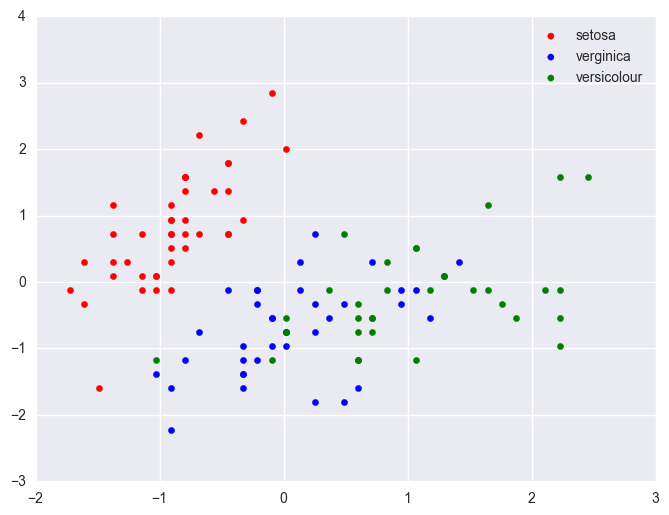

In [5]:
# let's plot the data
plt.figure(figsize=(8,6))

plt.scatter(X_train[:,0][y_train==0],X_train[:,1][y_train==0],color='red', label='setosa')
plt.scatter(X_train[:,0][y_train==1],X_train[:,1][y_train==1],color='blue', label='verginica')
plt.scatter(X_train[:,0][y_train==2],X_train[:,1][y_train==2],color='green', label='versicolour')

plt.legend(loc='best')

** Classification Report **  

    Accuracy = (TP+TN)/m  
    Precision = TP/(TP+FP)  
    Recall = TP/(TP+FN)  
    F1-score = 2 * Precision * Recall / (Precision + Recall)  


In [6]:
# predicting 
print(classification_report(y_pred=y_pred, y_true=y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       0.82      0.82      0.82        11
          2       0.89      0.89      0.89        19

avg / total       0.89      0.89      0.89        38



In [7]:
confusion_matrix(y_pred=y_pred, y_true=y_test)

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  2, 17]])

     Using a pipeline mechanism to build and test our model 

In [8]:
# create a composite estimator made by a pipeline of the standarization and the linear model
clf = pipeline.Pipeline([
        ('scaler', preprocessing.StandardScaler()),
        ('linear_model', SGDClassifier())
])

# create a k-fold cross validation iterator of k=5 folds
cv = KFold(X.shape[0], 5, shuffle=True, random_state=33)

# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(clf, X, y, cv=cv)

print(scores)

[ 0.93333333  0.9         0.83333333  0.86666667  0.86666667]


In [9]:
# mean accuracy 
print(np.mean(scores), sp.stats.sem(scores))

0.88 0.016996731712
